## Automated Feature Analysis - Experiment on the Topic of Speechstyles

Luise Haubenreiser

Necessary imports:

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import parselmouth
from parselmouth.praat import call
import statistics

from sklearn.manifold import TSNE
from scipy.stats import pearsonr
from parselmouth.praat import call
from scipy.stats.mstats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Read in the labeled segments:

In [2]:
lab_df = pd.read_csv('labels.txt', sep=' ', header=None)

Printing the number of rows and columns of the read file to check if everything was imported correctly:

In [3]:
lab_df.shape

(37, 2)

In [4]:
lab_df

,0,1
0,/Users/luisehaubenreiser/sprechstil/s_sprechst...,4.0
1,/Users/luisehaubenreiser/sprechstil/s_sprechst...,3.0
2,/Users/luisehaubenreiser/sprechstil/s_sprechst...,3.0
3,/Users/luisehaubenreiser/sprechstil/s_sprechst...,5.0
4,/Users/luisehaubenreiser/sprechstil/s_sprechst...,5.0
5,/Users/luisehaubenreiser/sprechstil/s_sprechst...,3.0
6,/Users/luisehaubenreiser/sprechstil/s_sprechst...,3.0
7,/Users/luisehaubenreiser/sprechstil/s_sprechst...,4.0
8,/Users/luisehaubenreiser/sprechstil/s_sprechst...,3.0
9,/Users/luisehaubenreiser/sprechstil/s_sprechst...,5.0


Renaming the columns, setting the index and cutting the path:

In [5]:
cols=['file', 'valence']
lab_df.columns = cols
lab_df = lab_df.set_index('file')

In [6]:
def rel_path(x):
    return os.path.basename(x)
lab_df.index = lab_df.index.to_series().apply(lambda x: rel_path(x))

In [7]:
lab_df.head(5)

,valence
file,
Haubenreiser_16_seg_00000026.wav,4.0
Haubenreiser_16_seg_00000032.wav,3.0
Haubenreiser_16_seg_00000033.wav,3.0
Haubenreiser_16_seg_00000027.wav,5.0
Haubenreiser_16_seg_00000019.wav,5.0


In [8]:
type(lab_df.valence)

pandas.core.series.Series

Not necessary, but interesting look at general information about the dataframe such as entries or memory usage:

In [9]:
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Haubenreiser_16_seg_00000026.wav to Haubenreiser_16_seg_00000003.wav
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   valence  37 non-null     float64
dtypes: float64(1)
memory usage: 592.0+ bytes


Starting to work with MatPlotLib and testing different features, such as the automatically plotted dataframe seen below with first column as x-axis and second column as y-axis.

<AxesSubplot:xlabel='file'>

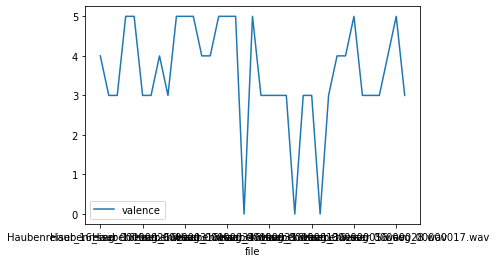

In [10]:
lab_df.plot()

<AxesSubplot:xlabel='file'>

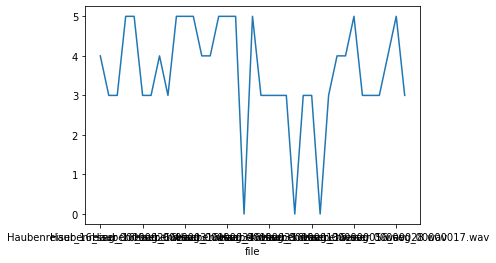

In [11]:
lab_df.valence.plot()

Showing the frequency distribution of the valence previously assessed on the Likert scale in the form of a list, a column chart, a pie chart and a boxplot:

In [12]:
lab_df.valence.value_counts()

3.0    16
5.0    11
4.0     7
0.0     3
Name: valence, dtype: int64

<AxesSubplot:>

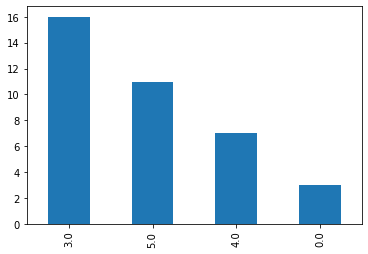

In [13]:
lab_df.valence.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='valence'>

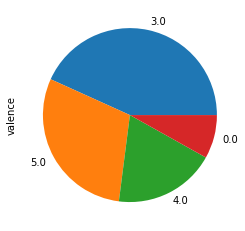

In [14]:
lab_df.valence.value_counts().plot(kind='pie')

<AxesSubplot:>

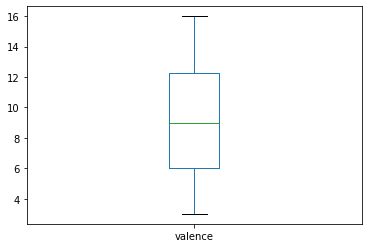

In [15]:
lab_df.valence.value_counts().plot(kind='box')

Working with Seaborn to create a violin plot (valence is displayed on the x-axis):

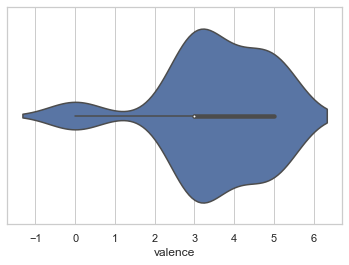

In [16]:
sns.set_theme(style='whitegrid')
ax = sns.violinplot(x=lab_df.valence)

### HNR-Analysis

We are using Feinbergs' Praat Script in order to analyse the HNR. The following cell is the function to measure voice pitch. It will read the sound, create a praat pitch object, extract the mean pitch and deduce the standart deviation.

In [17]:
# This is the function to measure voice pitch
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID) # read the sound
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    return meanF0, stdevF0, hnr

Creating lists to put the results:

In [18]:
file_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []

The function will go through all the .wav-files in the folder and measure their pitch:

In [19]:
for wave_file in glob.glob("/Users/luisehaubenreiser/sprechstil/s_sprechstil/audio/*.wav"):
    sound = parselmouth.Sound(wave_file)
    (meanF0, stdevF0, hnr) = measurePitch(sound, 75, 500, "Hertz")
    file_list.append(wave_file) # make an ID list
    mean_F0_list.append(meanF0) # make a mean F0 list
    sd_F0_list.append(stdevF0) # make a sd F0 list
    hnr_list.append(hnr)

Adding these lists to pandas in the right order:

In [20]:
df = pd.DataFrame(np.column_stack([file_list, mean_F0_list, sd_F0_list, hnr_list]), 
                               columns=['voiceID', 'meanF0Hz', 'stdevF0Hz', 'HNR'])

We can then write out the updated dataframe: 

In [21]:
df.to_csv("processed_results.csv", index=False)

In [22]:
sample_path = "/Users/luisehaubenreiser/sprechstil/s_sprechstil/audio/*.wav"

In [23]:
df_out = df[['voiceID', 'meanF0Hz']]

In [24]:
df_out.head(1)

,voiceID,meanF0Hz
0,/Users/luisehaubenreiser/sprechstil/s_sprechst...,198.69684323024288


Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script. The HNR-Analysis was originally part of a different notebook, hence the pickle. Feel free to pickle it, if you want to make use of the gained data elsewhere and stick with the layout of this notebook.

In [25]:
df_out.to_pickle('../f0df.pkl')

Using the dataframe of the meanF0Hz, obtained in the HNR-Analysis, we can draw a quick violinplot using seaborn:

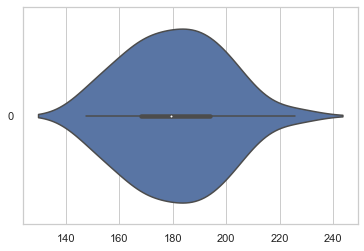

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(data=df["meanF0Hz"], orient='h')

### Importing the Dataframe from HNR-Analysis and merging it with the Valence Analysis

After preparing the pickle, I can now unpack it again:

In [27]:
df_f0 = pd.read_pickle('../f0df.pkl')

In [28]:
df_f0.head(2)

,voiceID,meanF0Hz
0,/Users/luisehaubenreiser/sprechstil/s_sprechst...,198.69684323024288
1,/Users/luisehaubenreiser/sprechstil/s_sprechst...,159.50631165406372


With the intention to merge the just loaded data frame with the data frame of the valence, this function adjusts and normalizes the data frame similar as above and renames the columns.

In [29]:
def norm_df(df):
    df = df.rename(columns={'voiceID':'file'})
    df = df.set_index('file')
    df.index = df.index.to_series().apply(lambda x: os.path.basename(x))
    return df

In [30]:
df_f0 = norm_df(df_f0)

In [31]:
lab_df.head(1)

,valence
file,
Haubenreiser_16_seg_00000026.wav,4.0


In [32]:
df_f0.head(1)

,meanF0Hz
file,
Haubenreiser_16_seg_00000026.wav,198.69684323024288


Merging the two dataframes:

In [33]:
df = lab_df.join(df_f0)

In [34]:
df['meanF0Hz'] = df['meanF0Hz'].astype(float)

Now, using MatplotLib, we can plot the fundamental frequency on the Y-axis and the valence on the X-axis.

<AxesSubplot:xlabel='valence', ylabel='meanF0Hz'>

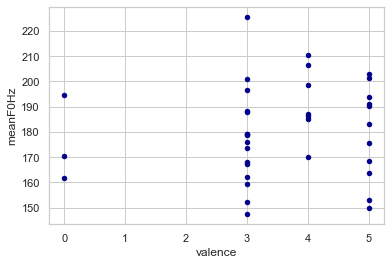

In [35]:
df.plot.scatter(y='meanF0Hz', x='valence', c='DarkBlue')

In [36]:
df.head()

,valence,meanF0Hz
file,,
Haubenreiser_16_seg_00000026.wav,4.0,198.696843
Haubenreiser_16_seg_00000032.wav,3.0,159.506312
Haubenreiser_16_seg_00000033.wav,3.0,162.339905
Haubenreiser_16_seg_00000027.wav,5.0,190.923521
Haubenreiser_16_seg_00000019.wav,5.0,150.062948


### Measure Pitch, HNR, Jitter, Shimmer, Formants, and Estimate Vocal Tract Length

Here Feinberg's Praat Script is used again to collect further measurement data. This function measures source acoustics as duration, pitch, HNR, jitter, and shimmer using default male parameters.

In [37]:
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID) # read the sound
    duration = call(sound, "Get total duration") # duration
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, f0min, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
    ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
    ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
    localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq3Shimmer = call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    aqpq5Shimmer = call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq11Shimmer =  call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    ddaShimmer = call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    
    return duration, meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer

### Function to measure formants at each glottal pulse

Puts, D. A., Apicella, C. L., & Cárdenas, R. A. (2012). Masculine voices signal men's threat potential in forager and industrial societies. Proceedings of the Royal Society of London B: Biological Sciences, 279(1728), 601-609.

Adapted from: DOI 10.17605/OSF.IO/K2BHS

In [38]:
# This function measures formants using Formant Position formula
def measureFormants(sound, wave_file, f0min,f0max):
    sound = parselmouth.Sound(sound) # read the sound
    pitch = call(sound, "To Pitch (cc)", 0, f0min, 15, 'no', 0.03, 0.45, 0.01, 0.35, 0.14, f0max)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    
    formants = call(sound, "To Formant (burg)", 0.0025, 5, 5000, 0.025, 50)
    numPoints = call(pointProcess, "Get number of points")

    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []
    
    # Measure formants only at glottal pulses
    for point in range(0, numPoints):
        point += 1
        t = call(pointProcess, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f3 = call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
        f4 = call(formants, "Get value at time", 4, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2)
        f3_list.append(f3)
        f4_list.append(f4)
    
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']
    f3_list = [f3 for f3 in f3_list if str(f3) != 'nan']
    f4_list = [f4 for f4 in f4_list if str(f4) != 'nan']
    
    # calculate mean formants across pulses
    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)
    f3_mean = statistics.mean(f3_list)
    f4_mean = statistics.mean(f4_list)
    
    # calculate median formants across pulses, this is what is used in all subsequent calcualtions
    # you can use mean if you want, just edit the code in the boxes below to replace median with mean
    f1_median = statistics.median(f1_list)
    f2_median = statistics.median(f2_list)
    f3_median = statistics.median(f3_list)
    f4_median = statistics.median(f4_list)
    
    return f1_mean, f2_mean, f3_mean, f4_mean, f1_median, f2_median, f3_median, f4_median



### Function to run a 2-factor Principle Components Analysis (PCA) on Jitter and Shimmer

In [39]:
def runPCA(df):
    # z-score the Jitter and Shimmer measurements
    measures = ['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
                'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer']
    x = df.loc[:, measures].values
    x = StandardScaler().fit_transform(x)
    # PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['JitterPCA', 'ShimmerPCA'])
    principalDf
    return principalDf

This block of code runs the above functions on all of the '.wav' files in the /audio folder

In [40]:
# create lists to put the results
file_list = []
duration_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []
localJitter_list = []
localabsoluteJitter_list = []
rapJitter_list = []
ppq5Jitter_list = []
ddpJitter_list = []
localShimmer_list = []
localdbShimmer_list = []
apq3Shimmer_list = []
aqpq5Shimmer_list = []
apq11Shimmer_list = []
ddaShimmer_list = []
f1_mean_list = []
f2_mean_list = []
f3_mean_list = []
f4_mean_list = []
f1_median_list = []
f2_median_list = []
f3_median_list = []
f4_median_list = []

# Go through all the wave files in the folder and measure all the acoustics
for wave_file in glob.glob("/Users/luisehaubenreiser/sprechstil/s_sprechstil/audio/*.wav"):
    sound = parselmouth.Sound(wave_file)
    (duration, meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, 
     localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer) = measurePitch(
        sound, 75, 300, "Hertz")
    (f1_mean, f2_mean, f3_mean, f4_mean, f1_median, f2_median, f3_median, f4_median) = measureFormants(
        sound, wave_file, 75, 300)
    file_list.append(wave_file) # make an ID list
    duration_list.append(duration) # make duration list
    mean_F0_list.append(meanF0) # make a mean F0 list
    sd_F0_list.append(stdevF0) # make a sd F0 list
    hnr_list.append(hnr) #add HNR data
    
    # add raw jitter and shimmer measures
    localJitter_list.append(localJitter)
    localabsoluteJitter_list.append(localabsoluteJitter)
    rapJitter_list.append(rapJitter)
    ppq5Jitter_list.append(ppq5Jitter)
    ddpJitter_list.append(ddpJitter)
    localShimmer_list.append(localShimmer)
    localdbShimmer_list.append(localdbShimmer)
    apq3Shimmer_list.append(apq3Shimmer)
    aqpq5Shimmer_list.append(aqpq5Shimmer)
    apq11Shimmer_list.append(apq11Shimmer)
    ddaShimmer_list.append(ddaShimmer)
    
    # add the formant data
    f1_mean_list.append(f1_mean)
    f2_mean_list.append(f2_mean)
    f3_mean_list.append(f3_mean)
    f4_mean_list.append(f4_mean)
    f1_median_list.append(f1_median)
    f2_median_list.append(f2_median)
    f3_median_list.append(f3_median)
    f4_median_list.append(f4_median)

This block of code adds all of that data we just generated to a Pandas data frame.

In [41]:
# Add the data to Pandas
df = pd.DataFrame(np.column_stack([file_list, duration_list, mean_F0_list, sd_F0_list, hnr_list, 
                                   localJitter_list, localabsoluteJitter_list, rapJitter_list, 
                                   ppq5Jitter_list, ddpJitter_list, localShimmer_list, 
                                   localdbShimmer_list, apq3Shimmer_list, aqpq5Shimmer_list, 
                                   apq11Shimmer_list, ddaShimmer_list, f1_mean_list, 
                                   f2_mean_list, f3_mean_list, f4_mean_list, 
                                   f1_median_list, f2_median_list, f3_median_list, 
                                   f4_median_list]),
                                   columns=['voiceID', 'duration', 'meanF0Hz', 'stdevF0Hz', 'HNR', 
                                            'localJitter', 'localabsoluteJitter', 'rapJitter', 
                                            'ppq5Jitter', 'ddpJitter', 'localShimmer', 
                                            'localdbShimmer', 'apq3Shimmer', 'apq5Shimmer', 
                                            'apq11Shimmer', 'ddaShimmer', 'f1_mean', 'f2_mean', 
                                            'f3_mean', 'f4_mean', 'f1_median', 
                                            'f2_median', 'f3_median', 'f4_median'])

pcaData = runPCA(df) # Run jitter and shimmer PCA
df = pd.concat([df, pcaData], axis=1) # Add PCA data
# reload the data so it's all numbers
df.to_csv("processed_results.csv", index=False)
df = pd.read_csv('processed_results.csv', header=0)
df.sort_values('voiceID').head(20)

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,...,f1_mean,f2_mean,f3_mean,f4_mean,f1_median,f2_median,f3_median,f4_median,JitterPCA,ShimmerPCA
31,/Users/luisehaubenreiser/sprechstil/s_sprechst...,6.96,200.003612,46.196539,7.542818,0.021295,0.000106,0.011597,0.011700,0.034790,...,546.384259,1710.168187,2673.279341,3409.158335,491.277189,1665.894745,2766.879491,3451.123170,-0.908367,0.577573
28,/Users/luisehaubenreiser/sprechstil/s_sprechst...,6.96,181.219693,67.781394,6.583099,0.027337,0.000151,0.014513,0.013785,0.043539,...,514.121337,1686.938594,2572.739644,3415.689847,451.580940,1695.749636,2612.900474,3421.058010,3.127100,0.300434
33,/Users/luisehaubenreiser/sprechstil/s_sprechst...,0.96,188.961577,63.179791,4.592294,0.038657,0.000210,0.020853,0.026027,0.062559,...,809.414637,1853.536435,2661.514926,3467.421329,476.685942,1833.820691,2667.753112,3503.429285,6.939511,4.470823
36,/Users/luisehaubenreiser/sprechstil/s_sprechst...,4.00,194.847847,31.503039,9.077456,0.025538,0.000131,0.014214,0.013154,0.042642,...,499.847457,1746.072322,2617.777177,3394.918121,434.686175,1689.289321,2689.975705,3498.411646,0.031303,2.078520
24,/Users/luisehaubenreiser/sprechstil/s_sprechst...,6.05,174.218024,52.815641,8.320878,0.019516,0.000111,0.010292,0.009865,0.030876,...,568.168107,1628.064153,2648.687390,3352.482954,502.894541,1617.564078,2669.088036,3340.007195,0.685289,-1.689835
25,/Users/luisehaubenreiser/sprechstil/s_sprechst...,3.98,174.376605,31.504618,9.544347,0.021473,0.000123,0.012173,0.012261,0.036520,...,562.465995,1414.281250,2523.444639,3298.841487,525.254609,1444.646195,2550.195112,3352.202517,-1.005764,1.343563
22,/Users/luisehaubenreiser/sprechstil/s_sprechst...,6.96,176.900838,30.806952,9.984242,0.017316,0.000098,0.008944,0.008588,0.026831,...,511.618480,1750.790948,2664.286099,3411.042661,459.458887,1712.562736,2743.818897,3483.328233,-2.775307,-0.076897
19,/Users/luisehaubenreiser/sprechstil/s_sprechst...,4.90,168.117986,37.393372,10.905933,0.017062,0.000101,0.008472,0.008334,0.025416,...,457.276717,1518.362901,2691.549495,3430.916626,412.096529,1476.005327,2760.945860,3407.412163,-3.491440,0.347826
12,/Users/luisehaubenreiser/sprechstil/s_sprechst...,1.74,192.649048,28.399027,8.157595,0.013702,0.000071,0.006281,0.007736,0.018842,...,595.402382,1755.915661,2716.692218,3373.358784,451.339862,1583.721326,2737.002379,3480.659323,-5.280913,-0.024513
13,/Users/luisehaubenreiser/sprechstil/s_sprechst...,6.96,169.775116,36.539236,7.254598,0.019380,0.000113,0.009376,0.009781,0.028129,...,527.333830,1525.266881,2604.963164,3371.575751,501.292782,1568.977074,2575.366671,3409.228968,-1.142382,-0.522500


### Vocal-tract length estimates

##### Formant position
Puts, D. A., Apicella, C. L., & Cárdenas, R. A. (2012). Masculine voices signal men's threat potential in forager and industrial societies. Proceedings of the Royal Society of London B: Biological Sciences, 279(1728), 601-609.

In [42]:
df['pF'] = (zscore(df.f1_median) + zscore(df.f2_median) + zscore(df.f3_median) + zscore(df.f4_median)) / 4

##### Formant Dispersion
Fitch, W. T. (1997). Vocal tract length and formant frequency dispersion correlate with body size in rhesus macaques. The Journal of the Acoustical Society of America, 102(2), 1213-1222.

In [43]:
df['fdisp'] = (df['f4_median'] - df['f1_median']) / 3

##### Fn (Average Formant)
Pisanski, K., & Rendall, D. (2011). The prioritization of voice fundamental frequency or formants in listeners’ assessments of speaker size, masculinity, and attractiveness. The Journal of the Acoustical Society of America, 129(4), 2201-2212.

In [44]:
df['avgFormant'] = (df['f1_median'] + df['f2_median'] + df['f3_median'] + df['f4_median']) / 4

##### MFF
Smith, D. R., & Patterson, R. D. (2005). The interaction of glottal-pulse rate and vocal-tract length in judgements of speaker size, sex, and age. The Journal of the Acoustical Society of America, 118(5), 3177-3186.

In [45]:
df['mff'] = (df['f1_median'] * df['f2_median'] * df['f3_median'] * df['f4_median']) ** 0.25

##### Fitch VTL
Fitch, W. T. (1997). Vocal tract length and formant frequency dispersion correlate with body size in rhesus macaques. The Journal of the Acoustical Society of America, 102(2), 1213-1222.

In [46]:
# reload the data again
df.to_csv("processed_results.csv", index=False)
df = pd.read_csv('processed_results.csv', header=0)

df['fitch_vtl'] = ((1 * (35000 / (4 * df['f1_median']))) +
                   (3 * (35000 / (4 * df['f2_median']))) + 
                   (5 * (35000 / (4 * df['f3_median']))) + 
                   (7 * (35000 / (4 * df['f4_median'])))) / 4

##### Δ F
Reby,D.,& McComb,K.(2003). Anatomical constraints generate honesty: acoustic cues to age and weight in the roars of red deer stags. Animal Behaviour, 65, 519e-530.

In [47]:
xysum = (0.5 * df['f1_median']) + (1.5 * df['f2_median']) + (2.5 * df['f3_median']) + (3.5 * df['f4_median'])
xsquaredsum = (0.5 ** 2) + (1.5 ** 2) + (2.5 ** 2) + (3.5 ** 2)
df['delta_f'] = xysum / xsquaredsum

##### VTL( ΔF)
Reby,D.,&McComb,K.(2003).Anatomical constraints generate honesty: acoustic cues to age and weight in the roars of red deer stags. Animal Behaviour, 65, 519e-530.

In [48]:
df['vtl_delta_f'] = 35000 / (2 * df['delta_f'])

#### Save the final data

In [49]:
# Write out the final dataframe
df.to_csv("processed_results2.csv", index=False)

##### Run this to tell you when it's done

In [50]:
print("finished")

finished


Another pickle to save the dataframe for further use:

In [51]:
df.to_pickle('./measures_df.pkl')

### More featues extracted by Feinberg Praat skripts

Unpacking the created pickle and creating a new dataframe:

In [52]:
measures_df = pd.read_pickle('measures_df.pkl')

Removes the fundamental frequency, since this has already been collected and recorded in lab_df.

In [53]:
df = df.drop (columns=['meanF0Hz'])

Adds the columns Speaker and Sex to the data frame:

In [54]:
lab_df['speaker'] = 'luise'

In [55]:
lab_df['sex'] = 'female'

In [56]:
lab_df.head(1)

,valence,speaker,sex
file,,,
Haubenreiser_16_seg_00000026.wav,4.0,luise,female


In [57]:
measures_df.head(1)

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
0,/Users/luisehaubenreiser/sprechstil/s_sprechst...,2.68,195.338319,38.578491,7.972177,0.023279,0.00012,0.010919,0.010102,0.032758,...,3365.411185,0.992146,-1.085277,0.295472,957.842902,2057.828729,1652.630937,16.979747,1014.243758,17.254235


Normalizing the data frame, because only by renaming VoiceID to file the merging of the two data frames is possible.

In [58]:
measures_df = norm_df(measures_df)

Merging the dataframes:

In [59]:
df_all = lab_df.join(measures_df)

In [60]:
df_all.head(1)

,valence,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
file,,,,,,,,,,,,,,,,,,,,,
Haubenreiser_16_seg_00000026.wav,4.0,luise,female,2.68,195.338319,38.578491,7.972177,0.023279,0.00012,0.010919,...,3365.411185,0.992146,-1.085277,0.295472,957.842902,2057.828729,1652.630937,16.979747,1014.243758,17.254235


In [61]:
df_all.shape

(37, 35)

Generating a new pickle file with the combined data from the different data frames:

In [62]:
df_all.to_pickle('df_haubenreiser.pkl')

Via .iloc the first three columns (valence, speaker, sex) can be hidden for display.

In [63]:
df_all.iloc[:,3:]

,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
file,,,,,,,,,,,,,,,,,,,,,
Haubenreiser_16_seg_00000026.wav,2.68,195.338319,38.578491,7.972177,0.023279,0.000120,0.010919,0.010102,0.032758,0.136354,...,3365.411185,0.992146,-1.085277,0.295472,957.842902,2057.828729,1652.630937,16.979747,1014.243758,17.254235
Haubenreiser_16_seg_00000032.wav,5.40,157.716148,30.092952,8.439987,0.020542,0.000129,0.011148,0.011465,0.033444,0.127704,...,3366.497053,1.028924,-0.887946,-0.019769,958.915296,2028.467930,1626.836532,17.235825,1003.584967,17.437487
Haubenreiser_16_seg_00000033.wav,2.06,153.964782,44.273153,4.307104,0.025879,0.000169,0.014092,0.011105,0.042275,0.121949,...,3392.733429,1.820984,0.979664,0.350927,950.104257,2050.834896,1679.627837,16.696948,1007.679108,17.366640
Haubenreiser_16_seg_00000027.wav,5.96,190.026728,38.010197,7.939515,0.023790,0.000126,0.012627,0.011925,0.037881,0.123361,...,3285.946280,0.258343,0.707991,-0.395265,944.973439,2011.378379,1599.034712,17.580996,991.548721,17.649158
Haubenreiser_16_seg_00000019.wav,3.06,150.102737,42.303679,6.488824,0.025975,0.000172,0.013196,0.013072,0.039589,0.155243,...,3202.965377,4.345233,-1.137188,-0.647834,898.614286,1959.989806,1582.389264,17.735647,969.488314,18.050759
Haubenreiser_16_seg_00000031.wav,2.84,178.999865,33.646248,9.775615,0.022567,0.000127,0.011307,0.014033,0.033921,0.117287,...,3335.009879,-0.363904,0.990384,-0.293769,961.610762,2014.980842,1591.805461,17.644449,999.400269,17.510502
Haubenreiser_16_seg_00000025.wav,6.96,174.588970,41.871143,7.093095,0.017988,0.000103,0.009071,0.009305,0.027214,0.129808,...,3343.217711,-0.154307,-1.914609,-0.127515,954.994715,2027.564670,1626.566727,17.256757,999.402719,17.510459
Haubenreiser_16_seg_00000024.wav,6.96,181.060231,42.747497,7.083667,0.023033,0.000127,0.012214,0.011868,0.036642,0.123324,...,3278.330959,0.273657,0.535894,-0.166381,916.604190,1998.512662,1623.237447,17.283649,986.960585,17.731205
Haubenreiser_16_seg_00000030.wav,5.96,162.900397,39.664237,7.411747,0.018397,0.000113,0.008435,0.008241,0.025306,0.109987,...,3325.831464,-2.301959,-0.286902,-0.312639,953.146452,2006.905488,1594.860038,17.592045,995.450416,17.579982


Enlisting all column names:

In [64]:
for i, col in enumerate(df_all.iloc[:,3:].columns):
    print(col)

duration
meanF0Hz
stdevF0Hz
HNR
localJitter
localabsoluteJitter
rapJitter
ppq5Jitter
ddpJitter
localShimmer
localdbShimmer
apq3Shimmer
apq5Shimmer
apq11Shimmer
ddaShimmer
f1_mean
f2_mean
f3_mean
f4_mean
f1_median
f2_median
f3_median
f4_median
JitterPCA
ShimmerPCA
pF
fdisp
avgFormant
mff
fitch_vtl
delta_f
vtl_delta_f


With the exception of the first three columns, a boxplot is created for each column. Here the valence is on the x-axis and the measurement data of the respective column on the y-axis.

/Users/luisehaubenreiser/indivsprech/s_indivsprech/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<Figure size 432x288 with 0 Axes>

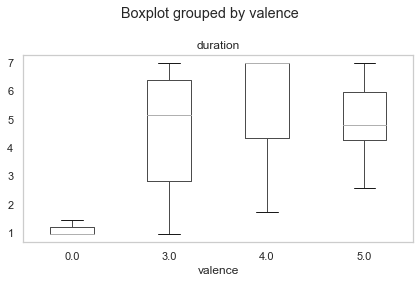

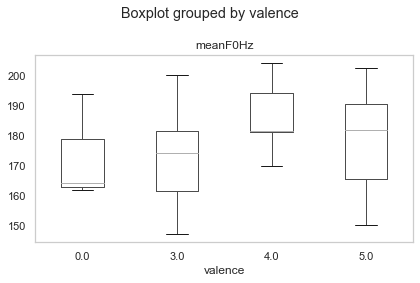

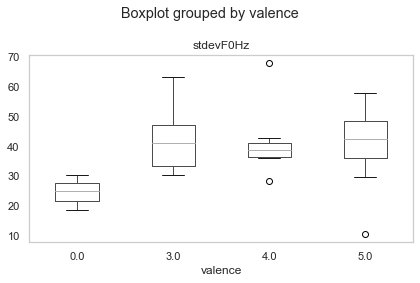

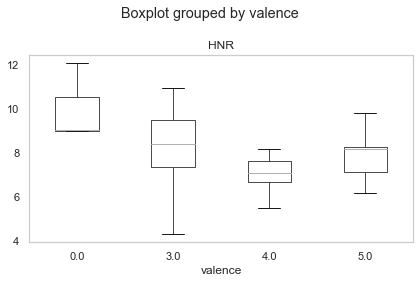

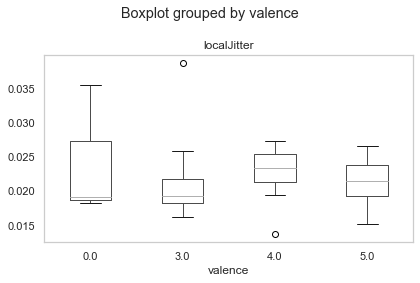

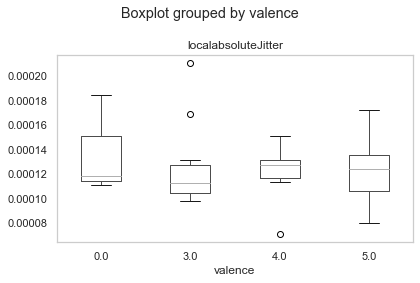

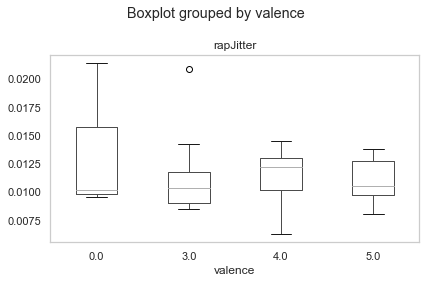

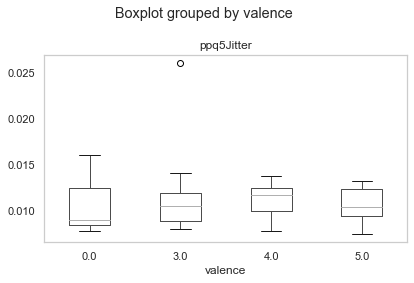

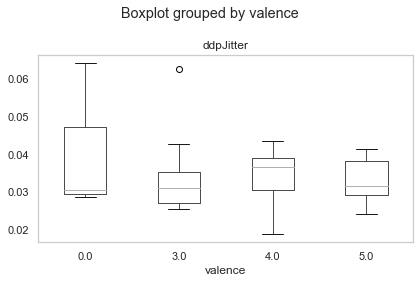

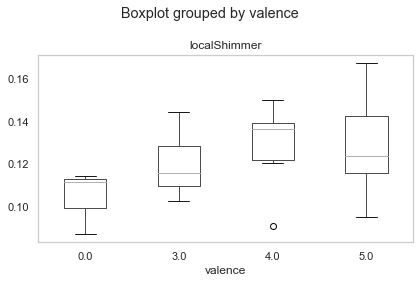

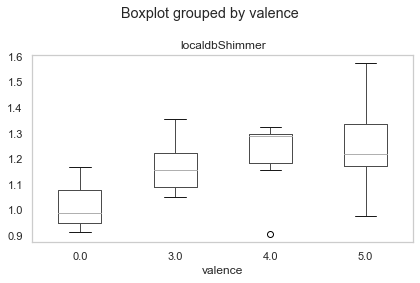

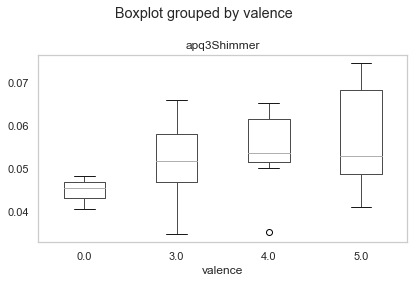

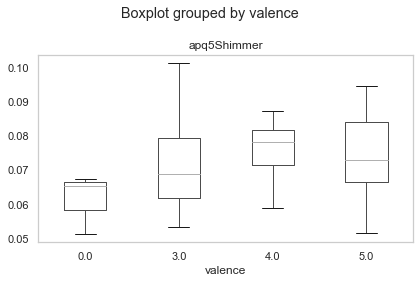

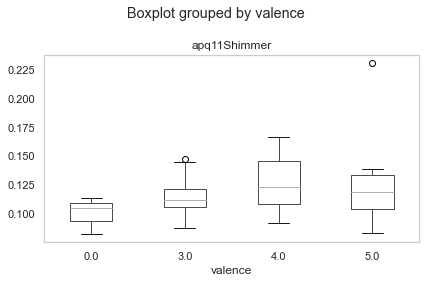

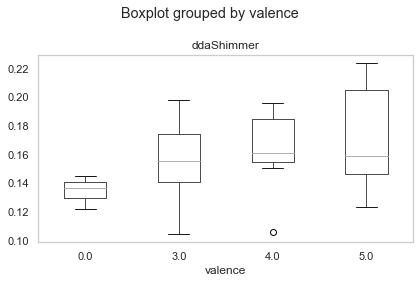

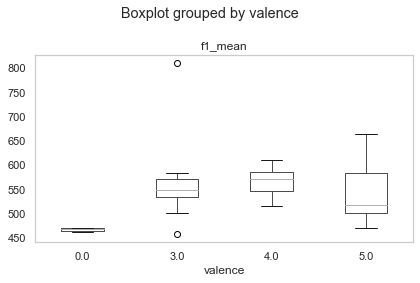

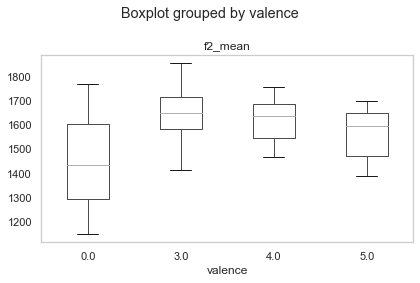

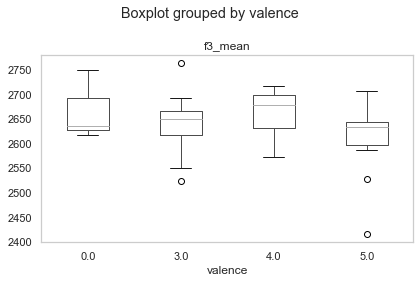

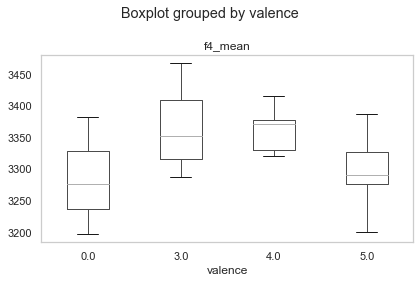

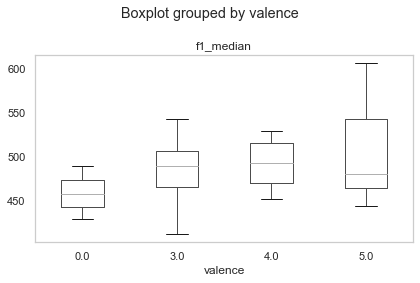

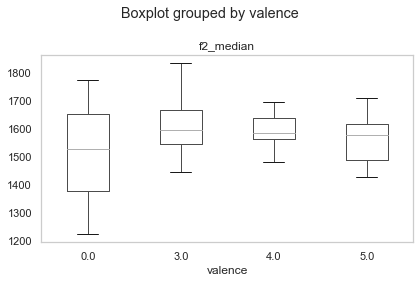

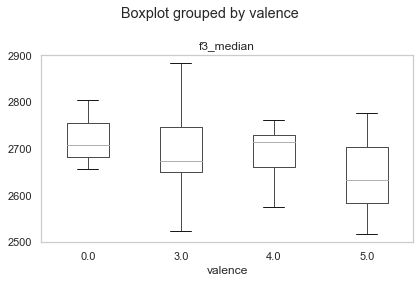

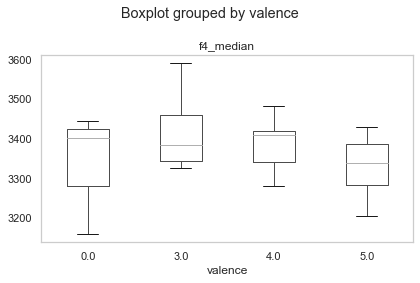

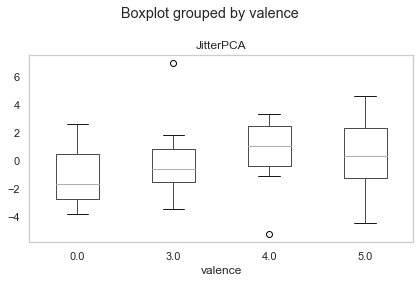

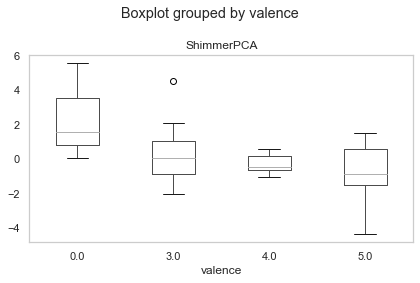

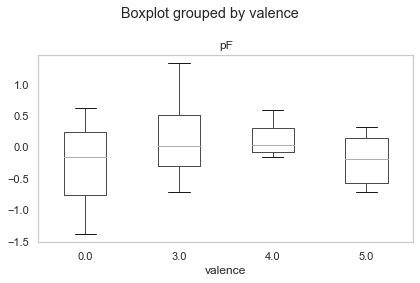

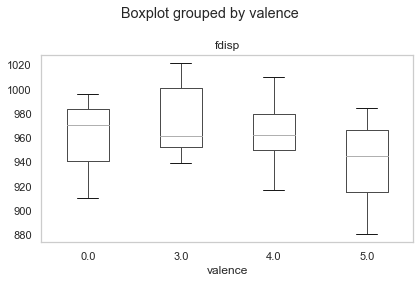

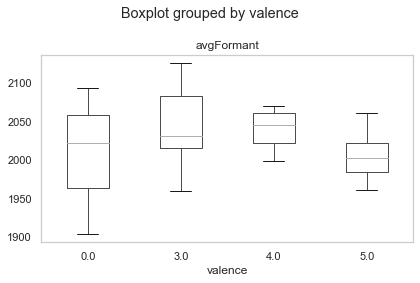

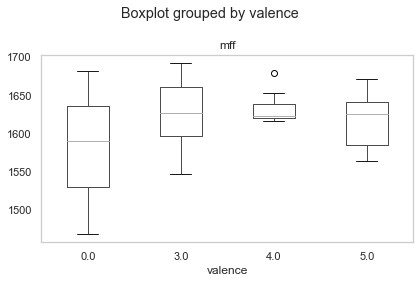

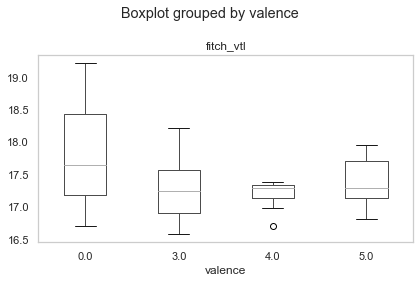

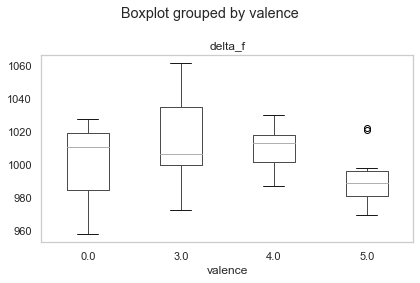

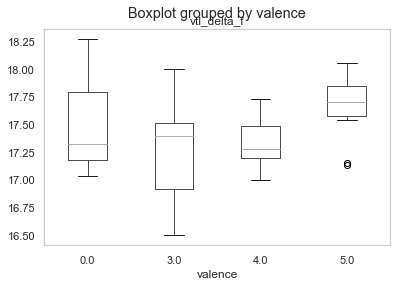

In [65]:
for i, col in enumerate(df_all.iloc[:,3:].columns):
    plt.tight_layout()
    df_all.boxplot(by ='valence', column =col, grid = False)

This function performs a statistical evaluation of the data using Pearson Correlation Coefficent and p-value to calculate which of the values has the highest correlation with the valence.
Moreover, it scans all columns and checks for "NaN". In this case the "NaN" value is replaced by the average/mean value, otherwise the process is aborted.

In [66]:
from scipy.stats import pearsonr
import numpy as np
pearsons = []
for i, col in enumerate(df_all.iloc[:,3:].columns):
    if np.isnan(df_all[col]).any():
        print('{} includes {} nan, I\'ll insert mean values'.format(col, df_all[col].isna().sum()))
        df_all[col] = df_all[col].fillna(df_all[col].mean())
    r, p = pearsonr(df_all['valence'], df_all[col])
    pearsons.append({'val':col, 'pcc':round(r, 3), 'p-val':round(p, 3)})

In [67]:
sorted(pearsons, key=lambda x: -x['pcc'])

[{'val': 'duration', 'pcc': 0.439, 'p-val': 0.007},
 {'val': 'localdbShimmer', 'pcc': 0.403, 'p-val': 0.013},
 {'val': 'localShimmer', 'pcc': 0.361, 'p-val': 0.028},
 {'val': 'apq3Shimmer', 'pcc': 0.353, 'p-val': 0.032},
 {'val': 'ddaShimmer', 'pcc': 0.353, 'p-val': 0.032},
 {'val': 'apq5Shimmer', 'pcc': 0.292, 'p-val': 0.08},
 {'val': 'stdevF0Hz', 'pcc': 0.29, 'p-val': 0.081},
 {'val': 'f1_median', 'pcc': 0.282, 'p-val': 0.09},
 {'val': 'apq11Shimmer', 'pcc': 0.262, 'p-val': 0.117},
 {'val': 'f1_mean', 'pcc': 0.237, 'p-val': 0.159},
 {'val': 'vtl_delta_f', 'pcc': 0.171, 'p-val': 0.31},
 {'val': 'JitterPCA', 'pcc': 0.164, 'p-val': 0.333},
 {'val': 'meanF0Hz', 'pcc': 0.158, 'p-val': 0.35},
 {'val': 'mff', 'pcc': 0.142, 'p-val': 0.401},
 {'val': 'f2_mean', 'pcc': 0.108, 'p-val': 0.525},
 {'val': 'f2_median', 'pcc': 0.042, 'p-val': 0.806},
 {'val': 'pF', 'pcc': -0.042, 'p-val': 0.805},
 {'val': 'ppq5Jitter', 'pcc': -0.051, 'p-val': 0.763},
 {'val': 'f4_mean', 'pcc': -0.084, 'p-val': 0.621

Some supplementary visualisations, that were not part of the course:

<AxesSubplot:title={'center':'HNR'}, xlabel='valence'>

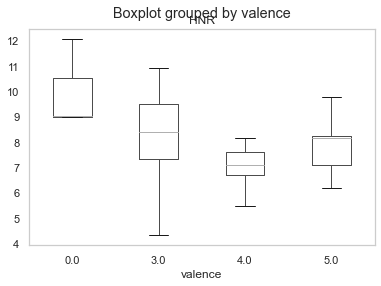

In [68]:
df_all.boxplot(by ='valence', column ='HNR', grid = False)

<AxesSubplot:xlabel='valence', ylabel='localShimmer'>

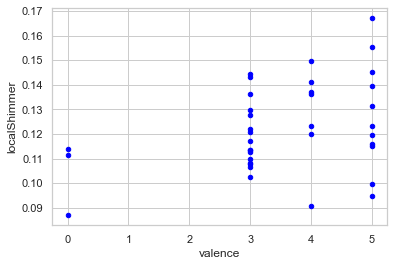

In [69]:
df_all.plot.scatter(y='localShimmer', x='valence', c='blue')

### Unifying the different dataframes from the course, analyzing and comparing

Starting off, by setting the directory and reading the different pickled dataframes.

In [70]:
in_directory = './dataframes/'

df_unif = pd.DataFrame()
for file in glob.glob(in_directory+'*.pkl'):
    print(file)
    df_tmp = pd.read_pickle(file)
    df_unif = df_unif.append(df_tmp)

./dataframes/junack_df.pkl
./dataframes/wegner_df.pkl
./dataframes/mueller_df.pkl
./dataframes/puder_df.pkl
./dataframes/wendel_df.pkl
./dataframes/anghelescu_df.pkl
./dataframes/df_haubenreiser.pkl
./dataframes/nellesen_df.pkl
./dataframes/fleschner_df.pkl
./dataframes/burkhardt_df.pkl
./dataframes/mettig_df.pkl
./dataframes/wannenmacher_df.pkl


A quick look at the new dataframe to check im the import ran smoothly:

In [71]:
df_unif.shape

(507, 35)

In [72]:
df_unif.head()

,valence,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
file,,,,,,,,,,,,,,,,,,,,,
Junack_16_seg_00000001.wav,4.0,lea,female,3.70,223.683874,23.948554,12.859103,0.021060,0.000094,0.009827,...,3753.854141,1.331701,0.440688,0.301883,1099.128918,2140.933635,1648.097299,17.050218,1082.432372,16.167292
Junack_16_seg_00000002.wav,5.0,lea,female,4.86,234.408968,22.651883,13.344051,0.018018,0.000077,0.008563,...,3583.258002,3.037624,0.256922,-0.214863,1011.085121,2100.829869,1688.951032,16.605463,1048.186284,16.695506
Junack_16_seg_00000003.wav,6.0,lea,female,3.62,218.335611,25.714383,9.271155,0.024671,0.000114,0.012309,...,3742.951325,-3.484658,-0.956131,-0.220341,1097.623235,2102.915341,1603.874553,17.544493,1070.692592,16.344561
Junack_16_seg_00000004.wav,6.0,lea,female,5.32,226.496913,30.527600,13.436083,0.019627,0.000087,0.008897,...,3790.896124,0.238278,-1.344694,0.614245,1106.773306,2163.300292,1675.736134,16.754131,1091.454628,16.033649
Junack_16_seg_00000005.wav,5.0,lea,female,2.76,206.872641,22.703274,11.787735,0.023462,0.000114,0.012347,...,3650.083089,-0.938921,1.564002,-0.533371,1069.055079,2104.800662,1623.599414,17.312801,1060.296354,16.504820


In [73]:
df_unif.speaker.unique()

array(['lea', 'lisa', 'nina', 'Carolin-Antonia', 'tobias', 'irina',
       'luise', 'jannis', 'saskia', 'felix', 'alicia', 'sophie'],
      dtype=object)

For each valence value, the data of all speakers is plotted in relation to the meanF0Hz as a boxplot. Here, for example the difference between a valence value of 0 and a corresponding meanF0Hz of 160-175Hz and a valence value of 6 and a corresponding higher frequency of 220-230Hz becomes evident.

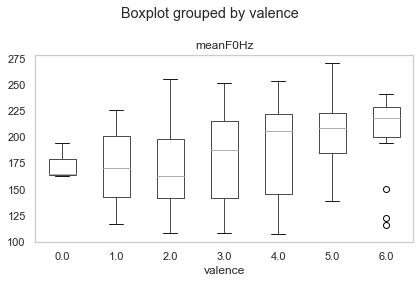

In [74]:
df_unif.boxplot(by ='valence', column ='meanF0Hz', grid = False)
plt.tight_layout()

<AxesSubplot:title={'center':'meanF0Hz'}, xlabel='sex'>

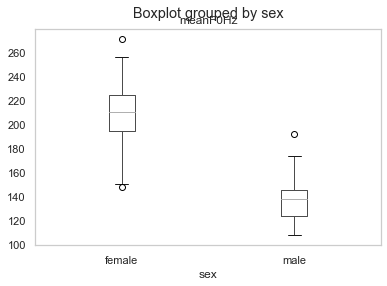

In [75]:
df_unif.boxplot(by ='sex', column ='meanF0Hz', grid = False)

This diagram puts the above boxplot partly into perspective, as it becomes clear here that the proportion of male speakers in the overall data pool is significantly lower than that of female speakers. Nevertheless, it is proven that men have deeper voices than women.

<AxesSubplot:>

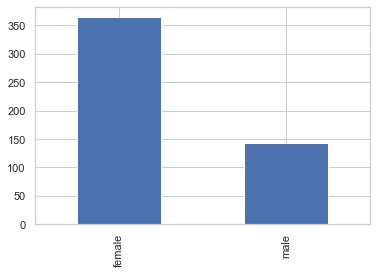

In [76]:
df_unif.sex.value_counts().sort_index().plot(kind='bar')

Enumerating the frequency of the different valence values of all speakers:

<AxesSubplot:>

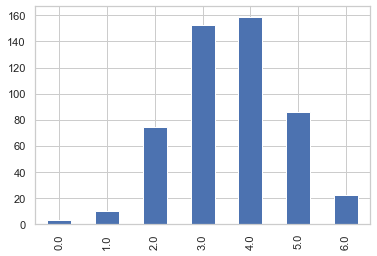

In [77]:
df_unif.valence.value_counts().sort_index().plot(kind='bar')

### Plotting a t-SNE (t-distributed stochastic neighbor embedding)

This technique allows dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

In [78]:
def plotTsne(feats, labels, perplexity=30, learning_rate=200):
    model = TSNE(n_components=2, random_state=0, perplexity=perplexity, learning_rate=learning_rate)
    tsne_data = model.fit_transform(feats)
    tsne_data_labs = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data_labs, columns=('Dim_1', 'Dim_2', 'label'))
    sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()
plotTsne(df_unif.iloc[:,3:], df_unif['valence'], 60, 200)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ValueError occurs, as the input contains NaN. So, we go on the hunt for the NaNs:

In [128]:
df_unif.isnull().values.any()

False

In [129]:
check_for_nan = df_unif['speaker'].isnull()
print (check_for_nan) 

file
Junack_16_seg_00000001.wav          False
Junack_16_seg_00000002.wav          False
Junack_16_seg_00000003.wav          False
Junack_16_seg_00000004.wav          False
Junack_16_seg_00000005.wav          False
                                    ...  
Wannenmacher_16_seg_00000028.wav    False
Wannenmacher_16_seg_00000016.wav    False
Wannenmacher_16_seg_00000002.wav    False
Wannenmacher_16_seg_00000003.wav    False
Wannenmacher_16_seg_00000017.wav    False
Name: speaker, Length: 507, dtype: bool


In [130]:
df_unif.shape

(507, 35)

Replacing the NANs with the mean value of the corresponding column.

In [131]:
for i, col in enumerate(df_unif.iloc[:,3:].columns):
    if np.isnan(df_unif[col]).any():
        print()
        print('{} includes {} nan, I\'ll insert mean values'.format(col, df_unif[col].isna().sum()))
        df_unif[col] = df_unif[col].fillna(df_unif[col].mean())
df_unif.to_pickle('all_participants_nanfree.pkl')

Replotting the t-SNE:

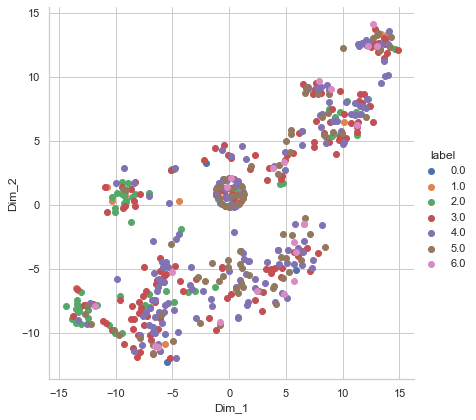

In [132]:
def plotTsne(feats, labels, perplexity=30, learning_rate=200):
    model = TSNE(n_components=2, random_state=0, perplexity=perplexity, learning_rate=learning_rate)
    tsne_data = model.fit_transform(feats)
    tsne_data_labs = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data_labs, columns=('Dim_1', 'Dim_2', 'label'))
    sns.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()
plotTsne(df_unif.iloc[:,3:], df_unif['valence'], 60, 200)

### Discretization of labels

Discretization is the process through which we can transform continuous variables, models or functions into a discrete form. We do this by creating a set of contiguous intervals (or bins) that go across the range of our desired variables. Continuous data is measured, while discrete data is counted.

But first, we read in the pickled data.

In [133]:
df_disc = pd.read_pickle('all_participants_nanfree.pkl')

With the goal of a binary representation, we still have to specify three values: a lower value, a mean value and an upper value. Everything with a valence below 4 becomes 0 and everything equal to or above four becomes 1. This is also a preparation for the graphical visualization. In addition, the command adds the column "val-bin", hosting the generated data, to the data frame. 

In [134]:
df_disc.insert(1, 'val_bin', -1)
df_disc['val_bin'] = np.digitize (df_disc.valence.values, [0,4,7])-1

In [135]:
df_disc.shape

(507, 36)

In [136]:
df_disc.head()

,valence,val_bin,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
file,,,,,,,,,,,,,,,,,,,,,
Junack_16_seg_00000001.wav,4.0,1,lea,female,3.70,223.683874,23.948554,12.859103,0.021060,0.000094,...,3753.854141,1.331701,0.440688,0.301883,1099.128918,2140.933635,1648.097299,17.050218,1082.432372,16.167292
Junack_16_seg_00000002.wav,5.0,1,lea,female,4.86,234.408968,22.651883,13.344051,0.018018,0.000077,...,3583.258002,3.037624,0.256922,-0.214863,1011.085121,2100.829869,1688.951032,16.605463,1048.186284,16.695506
Junack_16_seg_00000003.wav,6.0,1,lea,female,3.62,218.335611,25.714383,9.271155,0.024671,0.000114,...,3742.951325,-3.484658,-0.956131,-0.220341,1097.623235,2102.915341,1603.874553,17.544493,1070.692592,16.344561
Junack_16_seg_00000004.wav,6.0,1,lea,female,5.32,226.496913,30.527600,13.436083,0.019627,0.000087,...,3790.896124,0.238278,-1.344694,0.614245,1106.773306,2163.300292,1675.736134,16.754131,1091.454628,16.033649
Junack_16_seg_00000005.wav,5.0,1,lea,female,2.76,206.872641,22.703274,11.787735,0.023462,0.000114,...,3650.083089,-0.938921,1.564002,-0.533371,1069.055079,2104.800662,1623.599414,17.312801,1060.296354,16.504820


Plotting the 'val-bin' value as a bar chart to distinguish between high and low valence:

<AxesSubplot:>

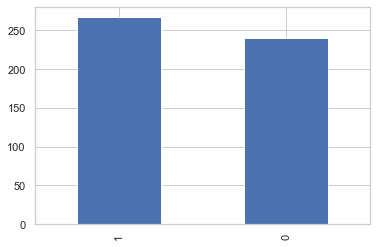

In [137]:
df_disc.val_bin.value_counts().plot(kind ='bar')

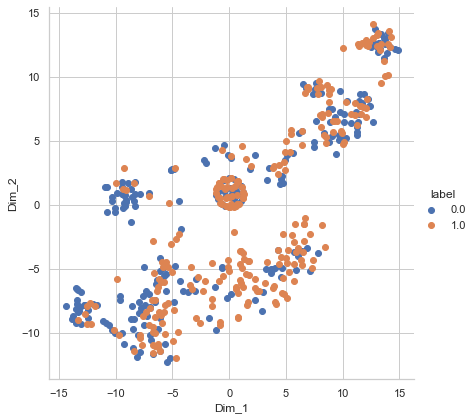

In [138]:
plotTsne(df_disc.iloc[:,4:], df_disc['val_bin'], 60, 200)

### Supplementary plots

We did not get further within the course, but it was quite interesting what one could see:

<AxesSubplot:xlabel='val_bin', ylabel='meanF0Hz'>

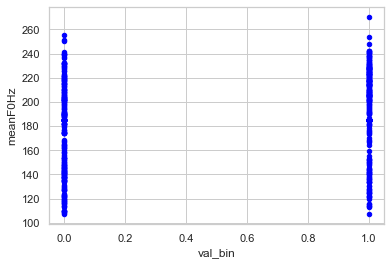

In [139]:
df_disc.plot.scatter(y='meanF0Hz', x='val_bin', c='blue')

<AxesSubplot:>

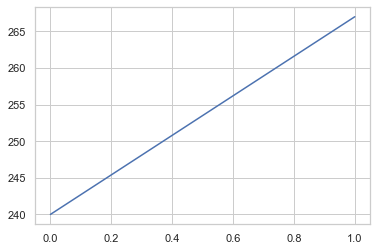

In [140]:
df_disc.val_bin.value_counts().plot(kind='line')

<AxesSubplot:xlabel='speaker'>

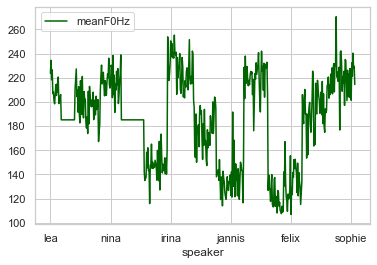

In [141]:
df_disc.plot.line(y='meanF0Hz', x= 'speaker', c='darkgreen')

<AxesSubplot:xlabel='val_bin'>

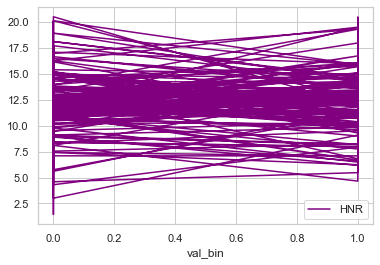

In [142]:
df_disc.plot.line(y='HNR', x= 'val_bin', c='purple')

<AxesSubplot:>

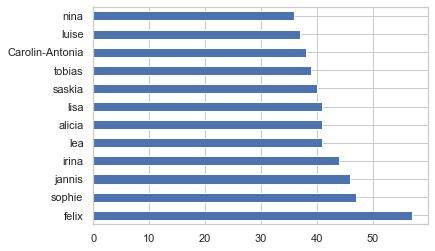

In [143]:
df_disc.speaker.value_counts().plot(kind='barh')